# Data Transformation Guide

## 1. Normalization

Scales each variable between 0 and 1.

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

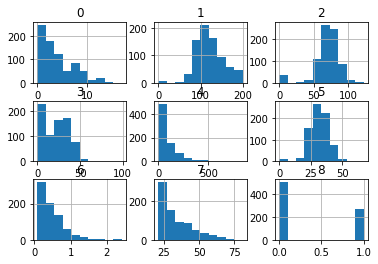

In [12]:
data = pd.read_csv('data/numerical_input.csv', header=None)
fig = data.hist()
plt.show()

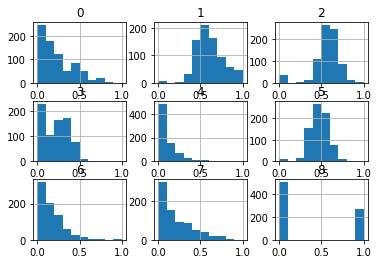

In [13]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data.values)
fig = pd.DataFrame(scaled).hist()
plt.show()

## 2. Standarization

Standardization for each variable subtracts the mean (centering) and divides by the standard deviation (scaling) changing the distribution to have a mean of zero and a standard deviation of one. (Standardization assumes that observations have a Gaussian distribution)

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

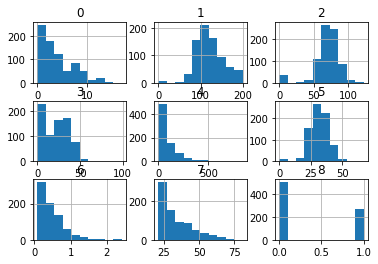

In [18]:
data = pd.read_csv('data/numerical_input.csv', header=None)
fig = data.hist()
plt.show()

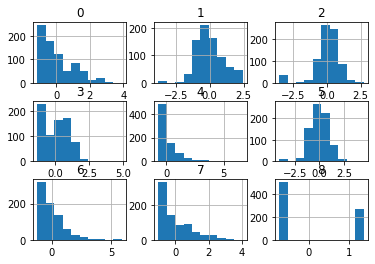

In [19]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data.values)
fig = pd.DataFrame(scaled).hist()
plt.show()

## 3. Transform to a Gaussian-like Distribution

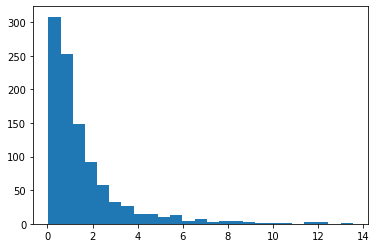

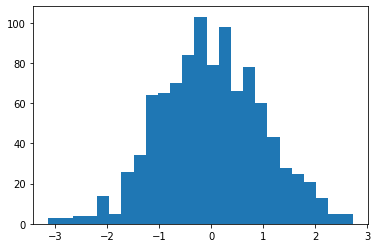

In [23]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot as plt

# generate gaussian data 
data = np.random.randn(1000)
data = data.reshape((len(data),1))

# add a skew to the data distribution
data = np.exp(data)
plt.hist(data, bins=25)
plt.show()

# power transform the raw data
#`yeo-johnson'--> when values are not always positive
#`box-cox'--> when the values are positive
power = PowerTransformer(method='box-cox')
data_trans = power.fit_transform(data)
plt.hist(data_trans, bins=25)
plt.show()

## 4. Polynomial Transformation

Polynomial features are those that are created by raising the existing variable to an exponent. For example, if a dataset has an input attribute of X, then a polynomial feature would be the addition of a new characteristic (column) where the values were calculated by squaring the values in X,  X2. Variables of grade 2 or 3 are usually added.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

data = np.asarray([[2,3],[4,5]])
print(data)

# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)
print(data)

[[2 3]
 [4 5]]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


## 5. Categorical Transformations

### 5.1 Ordinal Encoder

In [33]:
from sklearn.preprocessing import OrdinalEncoder

data = np.asarray([['red'], ['green'], ['blue']])
print(data)

encoder = OrdinalEncoder()
result = encoder.fit_transform(data)
print(result)

[['red']
 ['green']
 ['blue']]
[[2.]
 [1.]
 [0.]]


### 5.2 One-Hot Encoder

In [38]:
from sklearn.preprocessing import OneHotEncoder

data = np.asarray([['red'], ['green'], ['blue'], ['yellow']])
print(data)

#sparse:bool, default=True Will return sparse matrix if set True else will return an array.
encoder = OneHotEncoder(sparse=False)
result = encoder.fit_transform(data)
print(result)

[['red']
 ['green']
 ['blue']
 ['yellow']]
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
